<a href="https://colab.research.google.com/github/aditi1620/E-Vehicle_market_Analysis/blob/main/E_vehicle_market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
e_data=pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')
print(e_data.head())

   VIN (1-10)    Country       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [ ]:
e_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   Country                                            177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [ ]:
e_data.isnull().sum()

,0
VIN (1-10),0
Country,5
City,5
State,0
Postal Code,5
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
e_data=e_data.dropna()

<ipython-input-12-55c3bc62a003>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adpt_by_year.index, y=ev_adpt_by_year.values,palette='mako')


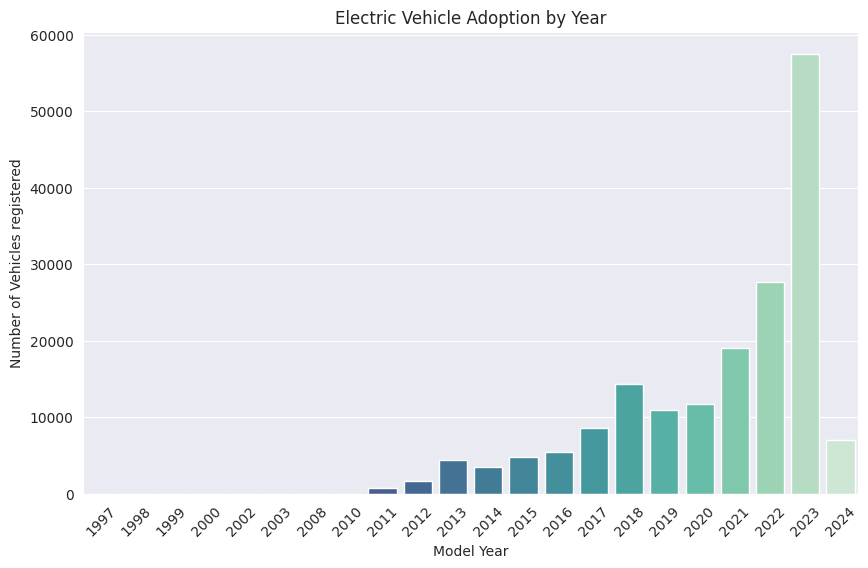

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

#E-Vechile Adoption over time
plt.figure(figsize=(10,6))
ev_adpt_by_year=e_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adpt_by_year.index, y=ev_adpt_by_year.values,palette='mako')
plt.title('Electric Vehicle Adoption by Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles registered')
plt.xticks(rotation=45)
plt.show()


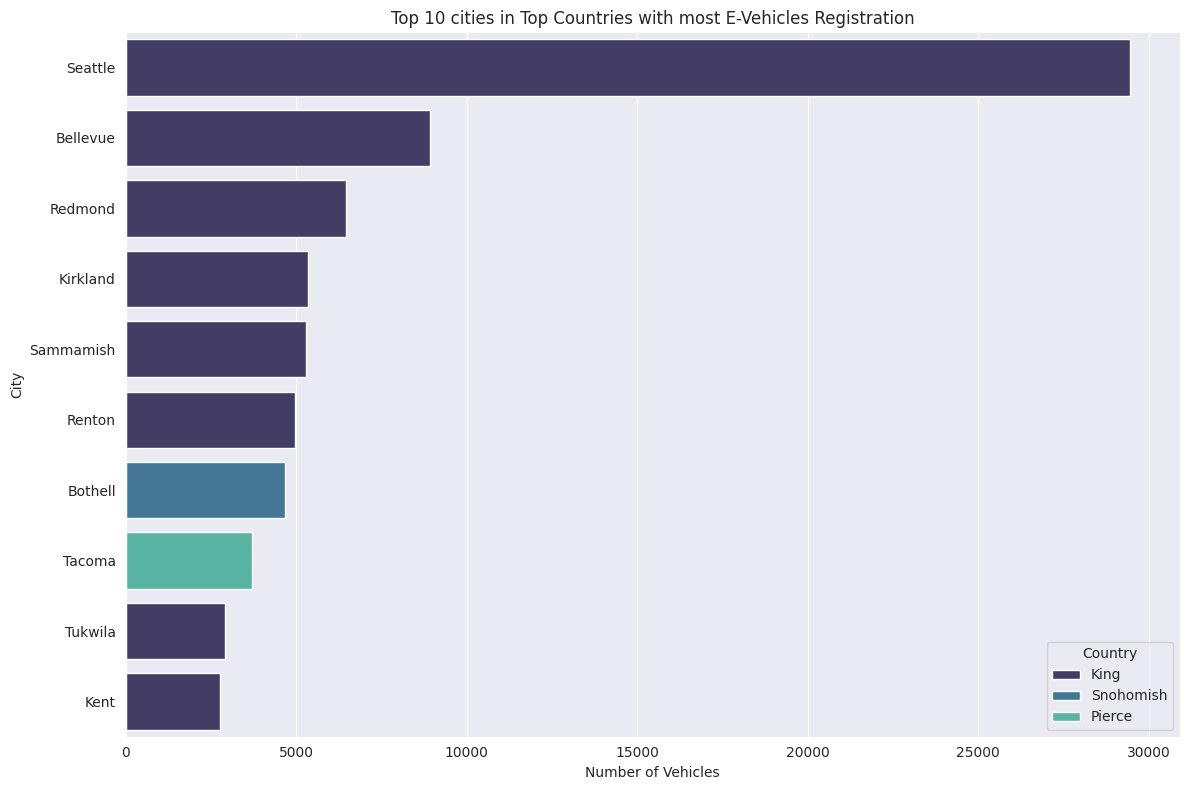

In [ ]:
#Geographical distribution at country level
ev_country_distribution=e_data['Country'].value_counts()
top_countries=ev_country_distribution.head(3).index

#filtering dataset for these top countries
top_countries_data=e_data[e_data['Country'].isin(top_countries)]

#analyzing the distribution of E-Vehicles within the top cities of these top countries
city_distribution_top_countries=top_countries_data.groupby(['Country','City']).size().sort_values(ascending=False).reset_index(name="Number of Vehicles")

#Visualize Top 10 cities across these countries
top_cities=city_distribution_top_countries.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles',y='City',data=top_cities,hue='Country',palette='mako')
plt.title("Top 10 cities in Top Countries with most E-Vehicles Registration")
plt.xlabel=("Number of Vehicles")
plt.ylabel=("City")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

TypeError: 'str' object is not callable

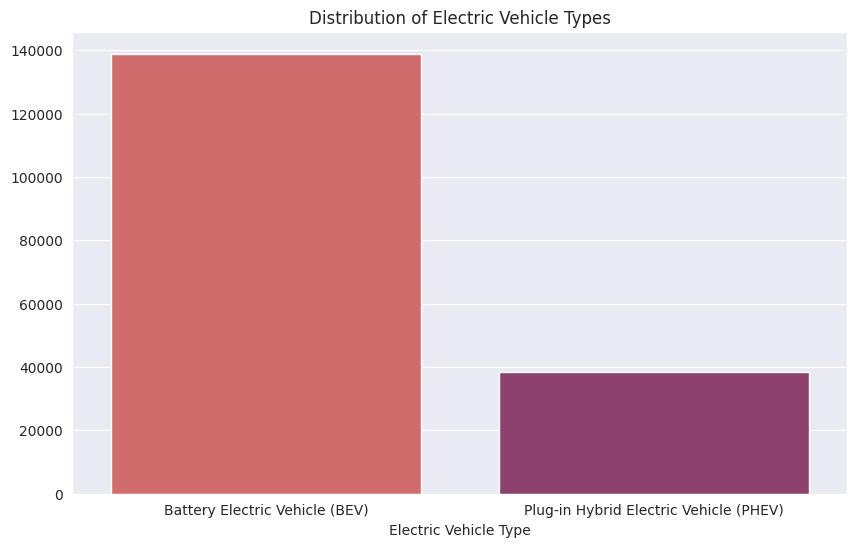

In [ ]:
#Analyzing the distribution of electric vehicle Types
ev_type_distribution=e_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=ev_type_distribution.index,y=ev_type_distribution.values,hue=ev_type_distribution.index,palette='flare')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.tight_layout()
plt.show()


<ipython-input-15-b11a6ccd2dbb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index,palette='rocket')


TypeError: 'str' object is not callable

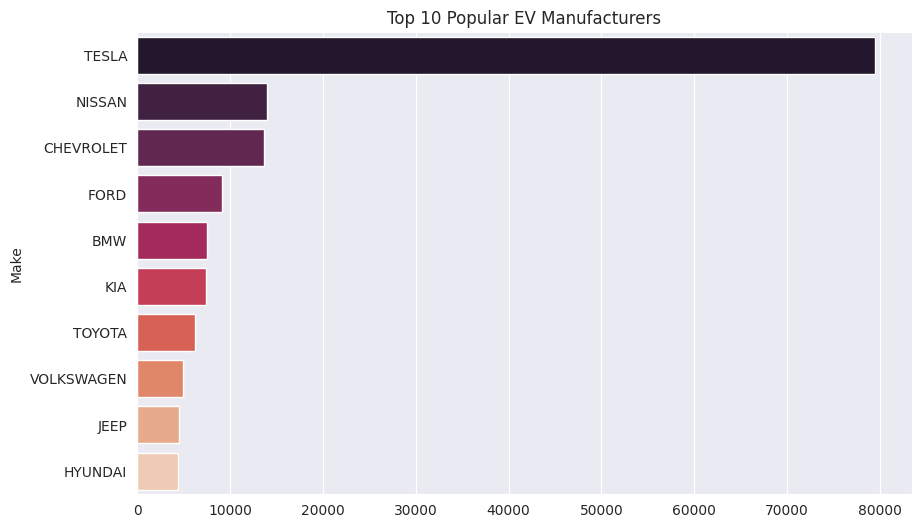

In [ ]:
#Analyzing popularity of EV manufacturers
ev_make_distribution=e_data['Make'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index,palette='rocket')
plt.title('Top 10 Popular EV Manufacturers')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('EV Manufacturer')
plt.tight_layout()
plt.show()

In [ ]:
#selecting top 3 manufacturers
top_3_manufactures=ev_make_distribution.head(3).index

TypeError: 'str' object is not callable

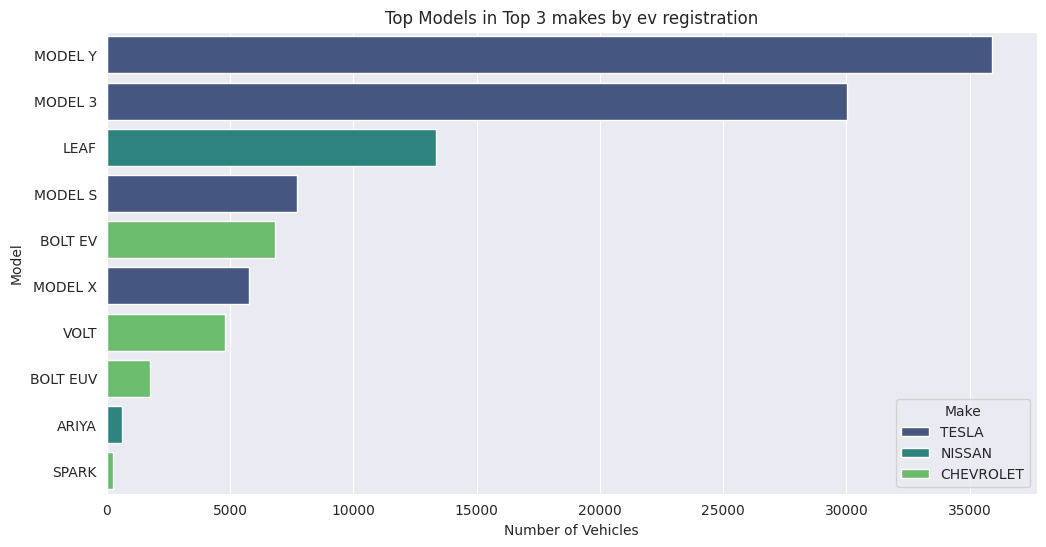

In [ ]:
#filtering dataset for these top manufacturers
top_manufactures_data=e_data[e_data['Make'].isin(top_3_manufactures)]

#analyzing popularity of models within top manufacturers
ev_model_top_maker=top_manufactures_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
top_models=ev_model_top_maker.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Number of Vehicles',y='Model',hue='Make',data=top_models,palette='viridis')
plt.title('Top Models in Top 3 makes by ev registration')
plt.xlabel('Number of Vehicles')
plt.ylabel('Model')
plt.legend(title='Make',loc='center right')
plt.tight_layout()
plt.show()


TypeError: 'str' object is not callable

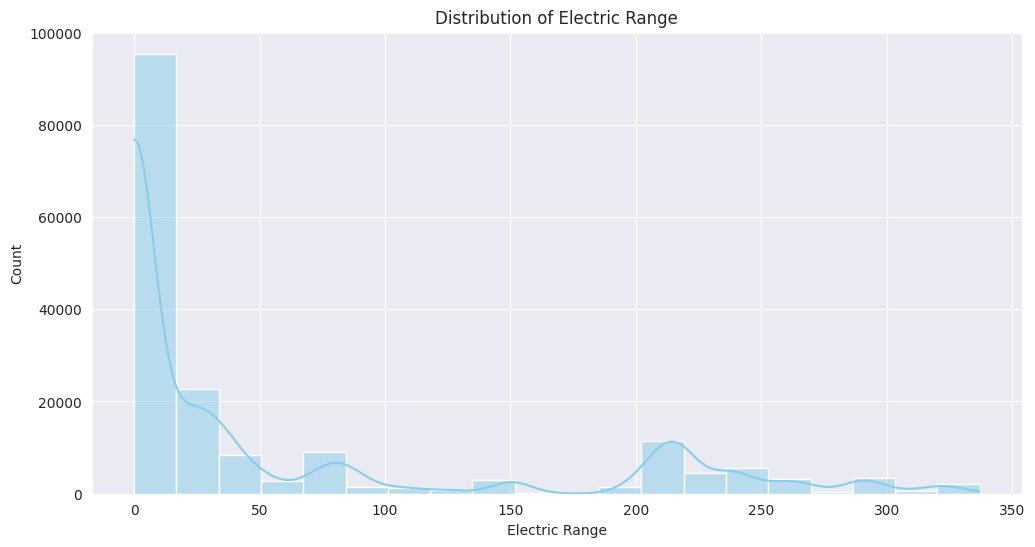

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(e_data['Electric Range'],bins=20,kde=True,color='skyblue')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.axvline(e_data['Electric Range'].mean(),color='red',linestyle='--',label=f'Mean Range: {e_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

TypeError: 'str' object is not callable

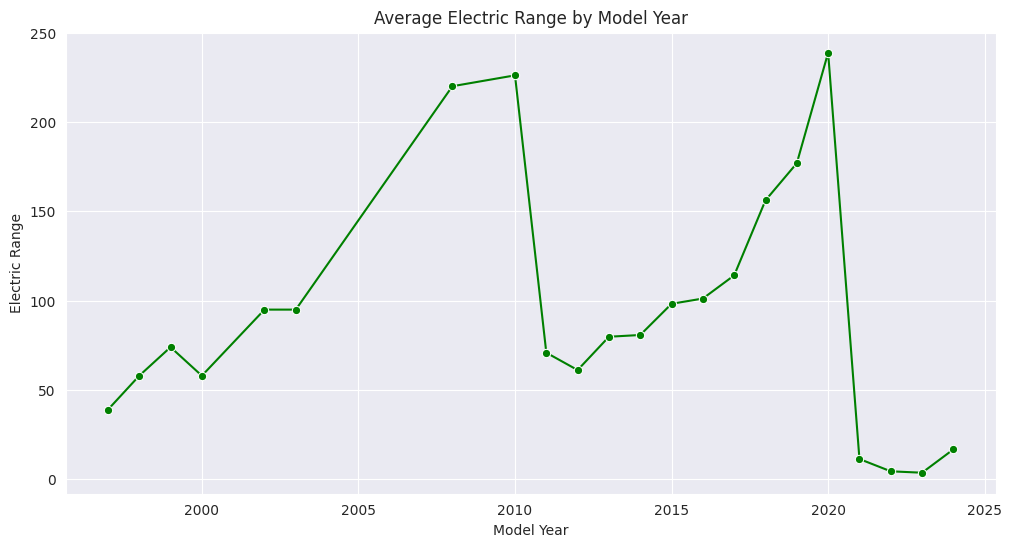

In [ ]:
avg_range_by_year=e_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Model Year', y='Electric Range', data=avg_range_by_year,color='green',marker='o')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range')
plt.grid(True)
plt.show()

TypeError: 'str' object is not callable

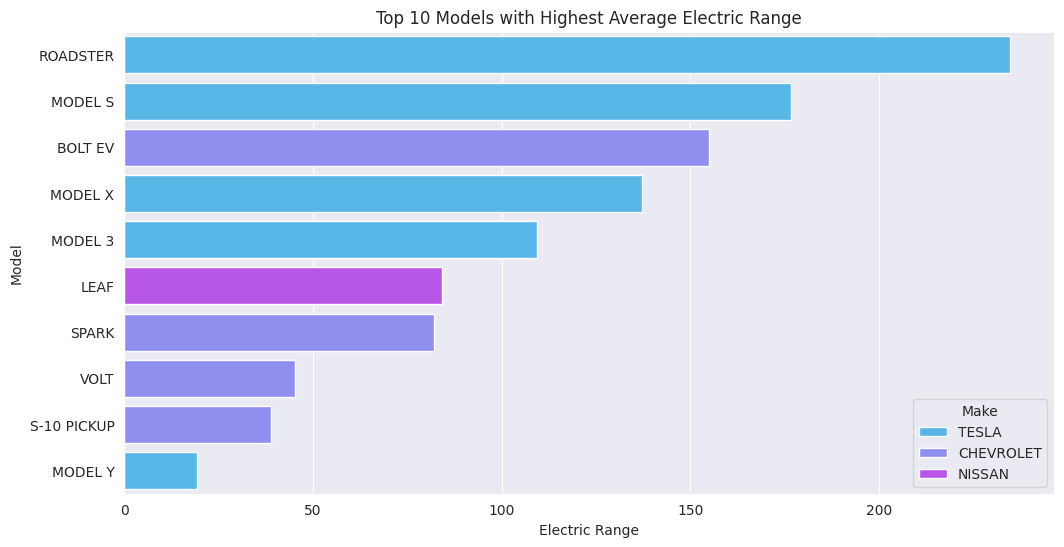

In [ ]:
avg_range_by_model=top_manufactures_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

#top 10 model with highest avg electric range
top_range_models=avg_range_by_model.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Electric Range',y='Model',hue='Make',data=top_range_models,palette='cool')
plt.title('Top 10 Models with Highest Average Electric Range')
plt.xlabel('Average Electric Range')
plt.ylabel('Model')
plt.legend(title='Make',loc='center right')
plt.legend(title='Make',loc='center right')
plt.tight_layout()
plt.show()



In [ ]:
#calculate the number of EVs registers each year
ev_registration=e_data['Model Year'].value_counts().sort_index()
ev_registration

,count
Model Year,
1997,1
1998,1
1999,5
2000,7
2002,2
2003,1
2008,19
2010,23
2011,775


In [ ]:
from scipy.optimize import curve_fit
import numpy as np



In [ ]:
#define a function for exponential growth to fit data

filtered_year=ev_registration[ev_registration.index<=2023]

def exp_growth(x,a,b):
  return a*np.exp(b*x)

#prepare the data for curve fitting
x_data=filtered_year.index-filtered_year.index.min()
y_data=filtered_year.values

#fit the data to exponential growth function
params,covariance=curve_fit(exp_growth,x_data,y_data)

#use the fitted function to forecast the number of EVs for 2024 and the next 5 years
forecast_years=np.arange(2024,2024+6)-filtered_year.index.min()
forecasted_values=exp_growth(forecast_years,*params)

#create a dictionary to display the forecasted values for easier interpretation
forecasted_evs=dict(zip(forecast_years+filtered_year.index.min(),forecasted_values))
print(forecasted_evs)




{2024: 79079.2066611501, 2025: 119653.95934090775, 2026: 181047.21317328632, 2027: 273940.7335817853, 2028: 414496.9933533305, 2029: 627171.2689549965}


<ipython-input-33-b819c1795d69>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(actual_years,actual_values,'bo-',label='Actual Registrations',color='red')
<ipython-input-33-b819c1795d69>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(forecast_years_full,forecasted_values_full,'ro--',label='Forecasted Registrations',color='green')


TypeError: 'str' object is not callable

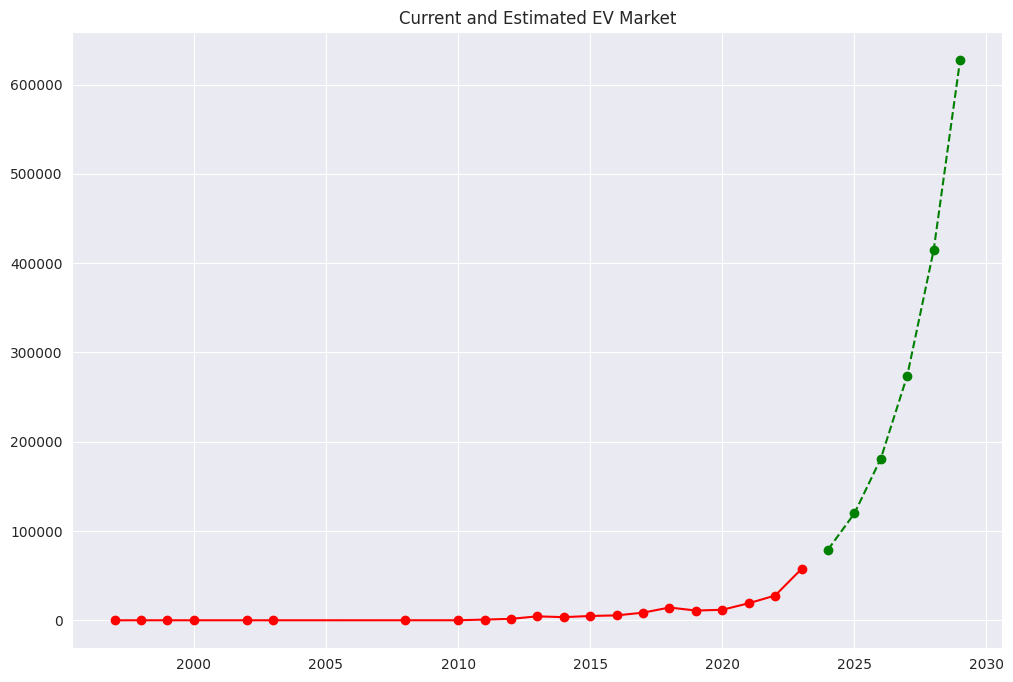

In [ ]:
#prepare data for plotting
years=np.arange(filtered_year.index.min(),2029+1)
actual_years=filtered_year.index
forecast_years_full=np.arange(2024,2029+1)

#actual and forecasted values
actual_values=filtered_year.values
forecasted_values_full=[forecasted_evs[year]for year in forecast_years_full]

plt.figure(figsize=(12,8))
plt.plot(actual_years,actual_values,'bo-',label='Actual Registrations',color='red')
plt.plot(forecast_years_full,forecasted_values_full,'ro--',label='Forecasted Registrations',color='green')

plt.title('Current and Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()
